# ML & DS coursework

## Partitioning Clustering Part

### 1st Subtask

#### Pre-processing tasks of scaling and outliers detection/removal

In [2]:
# Load the data from excel file
library(readxl)
vehicles <- read_excel("vehicles.xlsx")

In [3]:
# Remove the "Class" column
vehicles$Class <- NULL

In [4]:
# To check total null values and omit them
sum(is.na(vehicles)) # Check for missing values
vehicles <- na.omit(vehicles) # Remove missing values

[1] 0

In [5]:
# Calculate z-scores for each variable
z_scores <- apply(vehicles, 2, function(x) (x - mean(x)) / sd(x))

In [6]:
# Identify outliers using a threshold of 3 standard deviations
outliers <- which(abs(z_scores) > 3, arr.ind = TRUE)

In [7]:
# Remove outliers
vehicles <- vehicles[-outliers[,1], ]

In [8]:
# Scale data
vehicles <- scale(vehicles)

#### Clustering

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


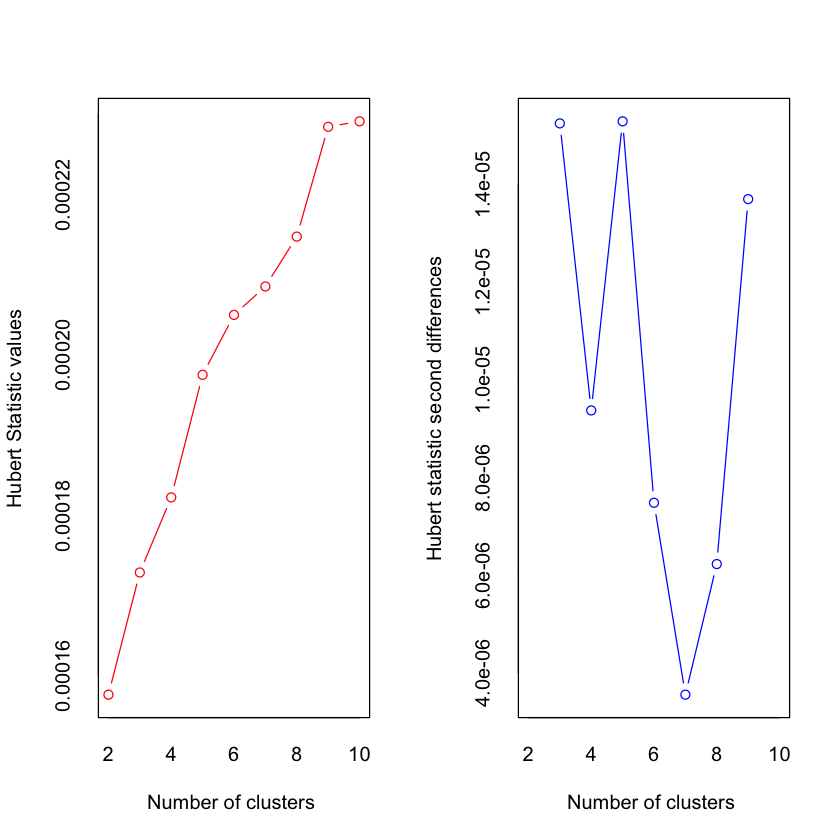

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 13 proposed 3 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Ratkowsky,Ball,PtBiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,3.00,2.0000,3.0000,8.0000,3.000,3.000000e+00,3.0,3.000,8.0000,3.0000,...,3.0000,3.000,2.0000,3.0000,2.0000,9.0000,0,2.0000,0,10.0000
Value_Index,3.52,559.6964,129.6405,5.7973,1034.123,5.127841e+37,328613.3,1230.976,220.2951,-0.2263,...,0.3887,2169.801,0.6441,1.4751,0.5164,0.1275,0,0.9177,0,0.4432


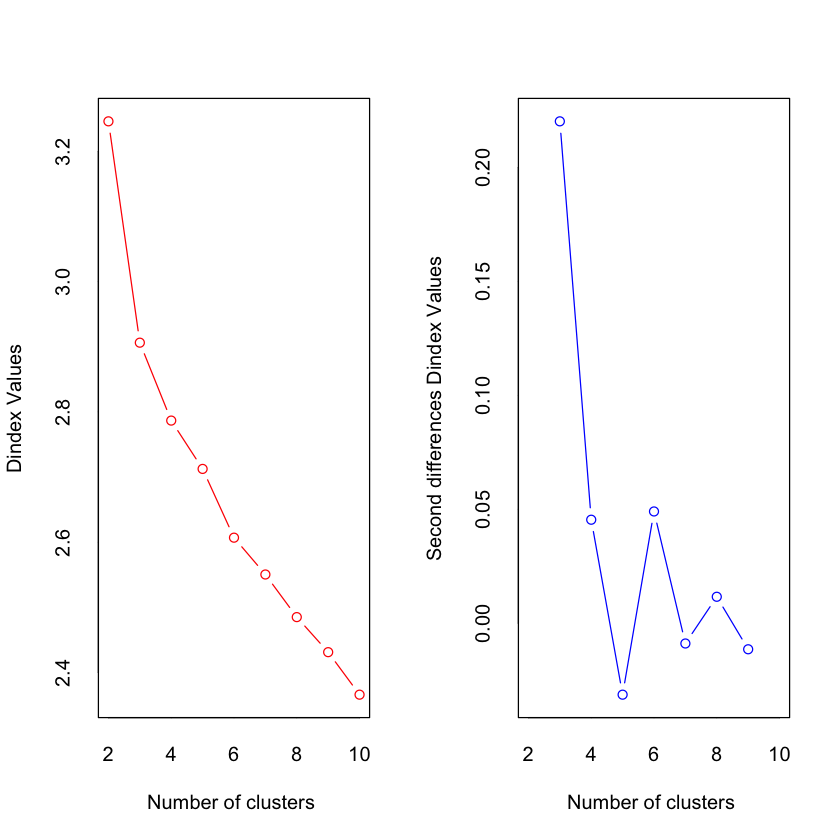

In [9]:
library(cluster)

# NBclust
library(NbClust)
set.seed(123)
NBclust <- NbClust(vehicles, distance = "euclidean", min.nc = 2, max.nc = 10, method = "kmeans")
NBclust$Best.nc # Best number of clusters

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



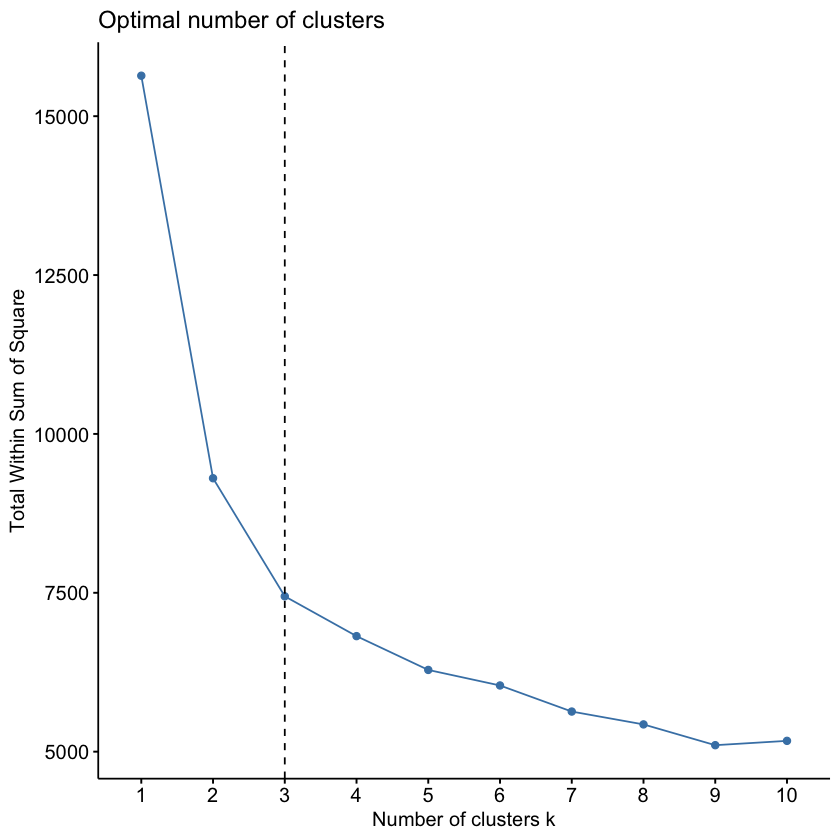

In [10]:
# Elbow method
library(factoextra)
fviz_nbclust(vehicles, kmeans, method = "wss") + geom_vline(xintercept = 3, linetype = 2)

Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"
Warning message:
"did not converge in 10 iterations"


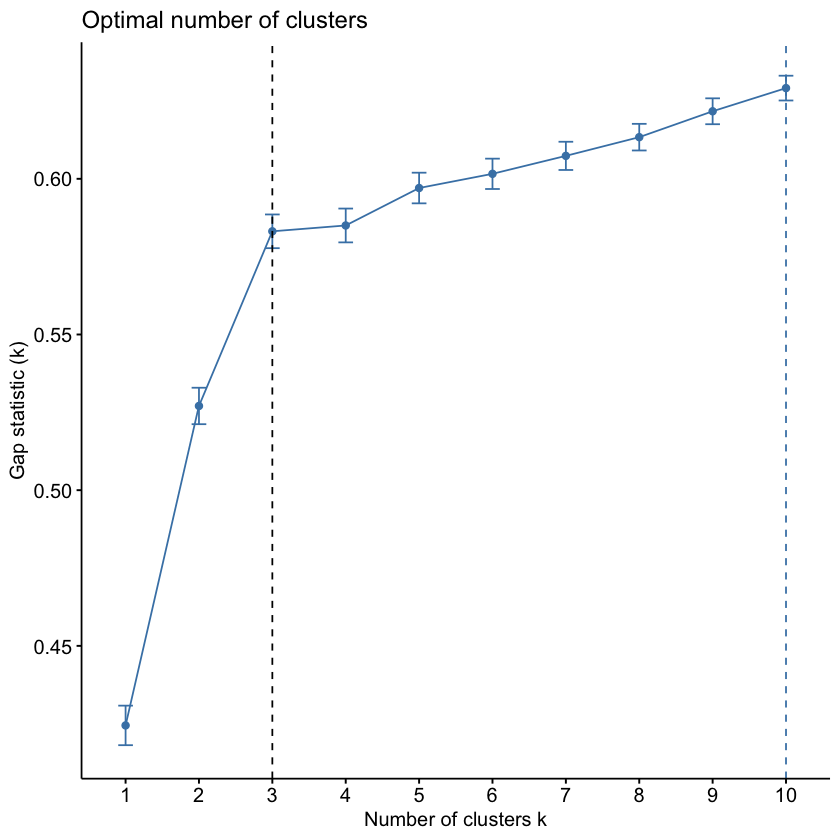

In [11]:
# Gap statistics
set.seed(123)
gap_stat <- clusGap(vehicles, FUN = kmeans, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat) + geom_vline(xintercept = 3, linetype = 2)

  cluster size ave.sil.width
1       1  332          0.20
2       2  255          0.37
3       3  237          0.27


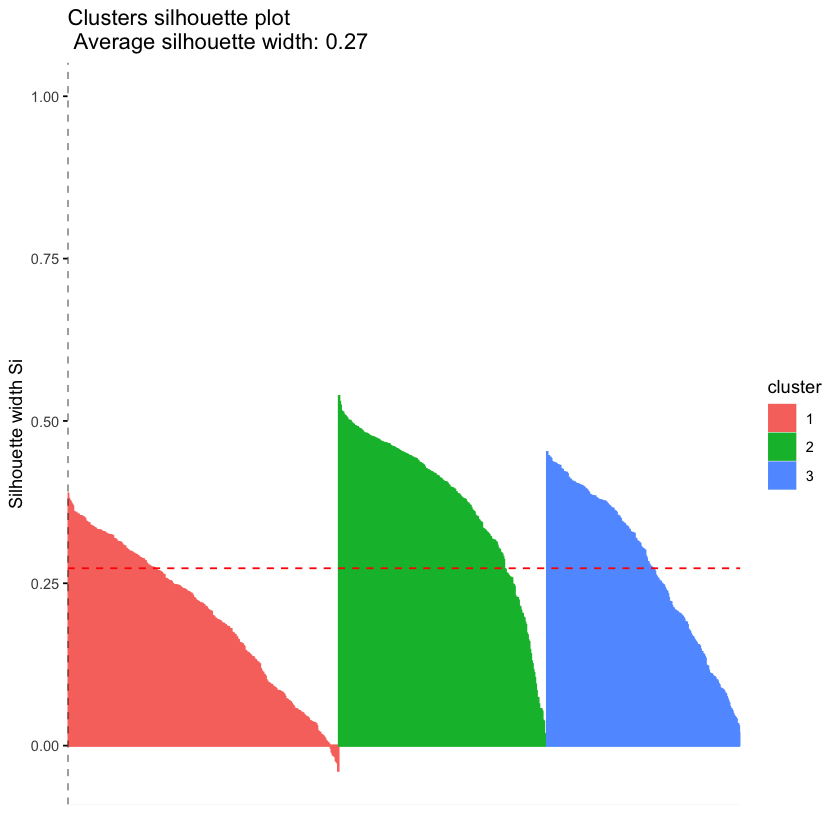

In [12]:
# Silhouette method
km <- kmeans(vehicles, centers = 3, nstart = 25)
sil_h <- silhouette(km$cluster, dist(vehicles))
fviz_silhouette(sil_h) + geom_vline(xintercept = 0.25, linetype = 2)

#### k-means Clustering

In [22]:
# Run kmeans with k=3
kmeans_model <- kmeans(vehicles, centers = 3, nstart = 25)

# Add cluster labels to original data frame
vehicles$cluster <- as.factor(kmeans_model$cluster)

# Convert kmeans output to data frame
centers <- as.data.frame(kmeans_model$centers)

# Plot data with cluster labels and centers
library(ggplot2)
ggplot(vehicles, aes(x = Highway.mpg, y = EngineSize, color = cluster)) +
  geom_point() +
  geom_point(data = centers, aes(x = Highway.mpg, y = EngineSize), color = "black", size = 4, shape = 21, fill = "white")


ERROR: Error in storage.mode(x) <- "double": 'list' object cannot be coerced to type 'double'
